# <font size="6"><font color='black'><center>IPL DATA ANALYSIS AND VISUALIZATION USING PYTHON

The Indian Premier League (IPL) is a professional Twenty20 cricket league, contested by eight teams based out of eight Indian cities. The league was founded by the Board of Control for Cricket in India (BCCI) in 2007. It is usually held between March and May of every year and has an exclusive window in the ICC Future Tours Programme.

![](https://cricketaddictor.gumlet.io/wp-content/uploads/2021/02/153757448_173638941016448_6980867142752435675_n.jpg?compress=true&quality=80&w=500&dpr=1.4)

As finally, this year IPL Season 14 has started again on Sept. 19, 2021 , the cricket mood is on. While watching the first match itself, the idea of analyzing IPL dataset struck my mind and luckily I found one dataset on Kaggle which contains the data of matches held between 2008-2020. So, I will be exploring interesting insights from the data of IPL matches. 

# TABLE OF CONTENTS

## 1. Reading the Dataset.
This chapter presents the steps to read the dataset about IPL matches.

## 2. Data Preparation: Cleaning and Formatting.
In all data-analysis projects, the data preparation step is not only necessary but also vital to find and handle features that could cause some problems while making the quantitative analysis, or that could lead to low efficient coding. According to Alivia Smith, this step usually takes up to 80% of the entire time of a data analysis project. Therefore, missing, invalid, and inconsistent values have been addressed. Finally, this step presents a code for changing the format of column names.

## 3. Exploratory Data Analysis (EDA) and Visualization. Quantitative and qualitative analysis (Asking and Answering Questions).
Although in many cases, the exploratory data analysis and the quantitative and qualitative analysis are separated steps, in this specific project, they have been joined. This step, previous to asking questions that could lead to reaching the project's aim, presents global-useful information about the different columns of the dataset. Some initial examinations were performed as a way of beginning finding patterns, creating hypotheses, and corroborating early assumptions. Later, deeper investigations were depicted as part of reaching the project's goal.

### Analysis covered:
1. Number of matches hosted in different cities.
2. Number of matches played in various seasons.
3. Total number of runs scored across seasons.
4. Matches played vs Matches won.
5. Maximum runs scored by a team.

### Asking and Answering Questions:
1. Which Team has won the maximum number of seasons?
2. Which team won the maximum number of matches in all seasons?
3. Does winning the toss increase the chances of winning the match?
4. Which player has become the Man of the Match most number of times?
5. Which team has scored the most number of 200+ scores?

## 4. Inferences and Conclusions.
Although all conclusions and answers are exposed in the previous section accordingly to each question, this section also presents, in a concise manner, the most significant insights.


# 1. READING THE DATASET
We're going to begin by importing all the packages we'll use in this project.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
ipl_df = pd.read_csv('IPL Matches 2008-2020.csv')
deliveries_df = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

Because the file is a comma-separated value (CSV) file, we use the pandas function pd.read_csv() to open and read the file.

# 2. DATA TREATMENT: CLEANING AND FORMATTING

In [3]:
ipl_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
deliveries_df.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [5]:
type(ipl_df)

pandas.core.frame.DataFrame

We have verified that the file has been created as a DataFrame variable. And we can see the first five rows of the dataset as a preview.

In [6]:
ipl_df.shape,deliveries_df.shape

((816, 17), (193468, 18))

In [7]:
print('The ipl dataset contains {} rows and {} columns'.format(ipl_df.shape[0],ipl_df.shape[1]))

The ipl dataset contains 816 rows and 17 columns


Now, let's see some additional information.

In [8]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [9]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [10]:
ipl_df.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

## Working with missing, incorrect, and invalid data
Let's check the NaN values within the entire data frame. We will see a list of columns sorted according to the number of NaN values that they present.

In [11]:
ipl_df.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [12]:
ipl_df.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


In [13]:
ipl_df.result.value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

The result column in the dataset specifies whether the matched ended normally or there was a tie between the teams or the match was cancelled due to rain or some unavoidable reasons.

In [14]:
ipl_df.team1.value_counts()

Royal Challengers Bangalore    108
Mumbai Indians                  97
Kolkata Knight Riders           95
Chennai Super Kings             94
Kings XI Punjab                 92
Delhi Daredevils                83
Rajasthan Royals                70
Sunrisers Hyderabad             59
Deccan Chargers                 39
Pune Warriors                   23
Delhi Capitals                  19
Gujarat Lions                   16
Kochi Tuskers Kerala             7
Rising Pune Supergiant           7
Rising Pune Supergiants          7
Name: team1, dtype: int64

We can see that, these are the all teams that have played in the last 12 seasons of IPL. Few of them like Rising Pune Supergiants, Gujarat Lions, Kochi Tuskers Kerala didn't play in more than 1-2 seasons. That's why their numbers are so low.

In [15]:
print('Total Matches Played:',ipl_df.shape[0])
print('\nVenues Played At:',ipl_df['city'].unique())     
print(' \nTeams :',ipl_df['team1'].unique())

Total Matches Played: 816

Venues Played At: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']
 
Teams : ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


# 3.Exploratory Data Analysis (EDA) and Visualization. Quantitative and qualitative analysis (Asking and Answering Questions).

To find insight from our dataset, we'll explore its variables. This exploratory analysis will help us to understand how the variables interact and how representative they are. In the end, it'll help us to formulate hypotheses to reach the goal of the project and think about future works. 

In [16]:
ipl_df.sample(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
470,829729,Mumbai,2015-04-17,A Nehra,Wankhede Stadium,0,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,Chennai Super Kings,wickets,6.0,N,NaN,AK Chaudhary,M Erasmus
693,1136618,Kolkata,2018-05-23,AD Russell,Eden Gardens,0,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,Kolkata Knight Riders,runs,25.0,N,NaN,AK Chaudhary,Nitin Menon
528,980923,Hyderabad,2016-04-18,DA Warner,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Mumbai Indians,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,7.0,N,NaN,HDPK Dharmasena,VK Sharma
415,729313,NaN,2014-04-28,Sandeep Sharma,Dubai International Cricket Stadium,1,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,field,Kings XI Punjab,wickets,5.0,N,NaN,BF Bowden,S Ravi
63,392186,Durban,2009-04-21,CH Gayle,Kingsmead,1,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,runs,11.0,N,D/L,DJ Harper,SD Ranade


## Number of matches hosted in different cities

In [17]:
city_host = ipl_df.city.value_counts()
city_host.head(10)

Mumbai        101
Kolkata        77
Delhi          74
Bangalore      65
Hyderabad      64
Chennai        57
Chandigarh     56
Jaipur         47
Pune           38
Abu Dhabi      29
Name: city, dtype: int64

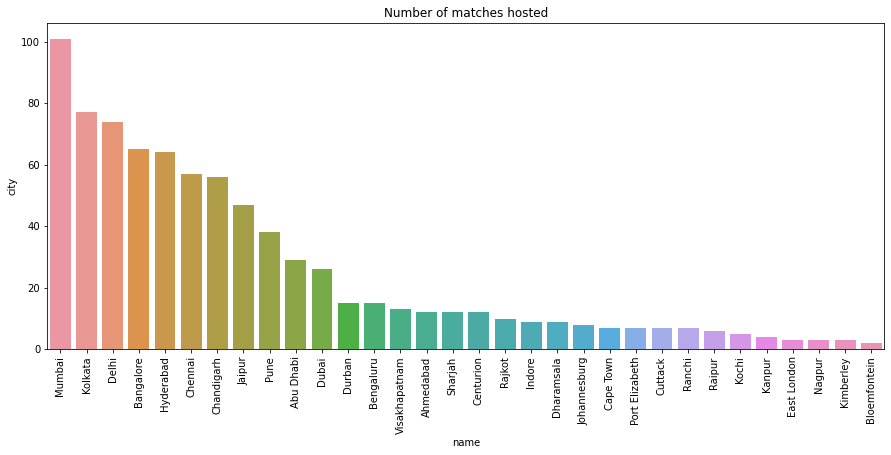

In [18]:
plt.figure(figsize=(15,6));
plt.xticks(rotation=90);
plt.title('Number of matches hosted')
cities=pd.DataFrame(city_host)
cities['name']=city_host.index
sns.barplot(x='name', y='city', data=cities);

So, we can see in the barplot that **Mumbai has hosted the maximum number of IPL matches** followed by Kolkata and Delhi.

## Number of matches played in various seasons 

In [19]:
ipl_df['Season'] = pd.DatetimeIndex(ipl_df['date']).year
ipl_df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [20]:
match_per_season=ipl_df.groupby(['Season'])['id'].count().reset_index()
match_per_season

,Season,id
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


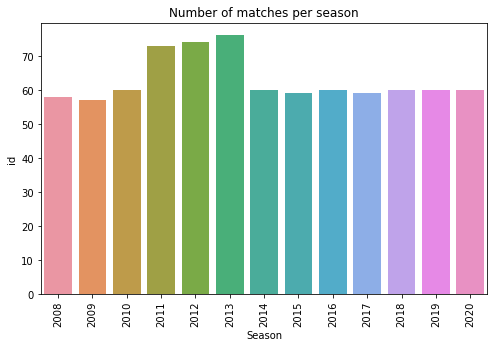

In [21]:
plt.figure(figsize=(8,5));
plt.xticks(rotation=90);
plt.title('Number of matches per season')
sns.barplot(x='Season', y='id', data=match_per_season);

Each season, **almost 60 matches were played**. However, we see a spike in the number of matches from 2011 to 2013. This is because two new franchises, the Pune Warriors and Kochi Tuskers Kerala, were introduced, increasing the number of teams to 10.

## Total number of runs scored across seasons 

In [22]:
season_data=ipl_df[['id','Season']].merge(deliveries_df, left_on = 'id', right_on = 'id', how = 'left').drop('id', axis = 1)
season_data.head()

,Season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


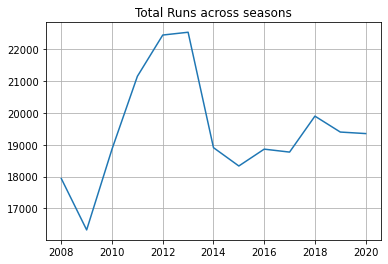

In [23]:
season=season_data.groupby(['Season'])['total_runs'].sum().reset_index()
plt.plot(season['Season'],season['total_runs']);
plt.title('Total Runs across seasons');
plt.grid();

**Season 2013 was the highest scoring season (22,541 runs)**, followed by 2012 (22,453 runs)
Season 2009 was the lowest scoring season (16,320 runs).

## Matches Played vs Matches Won

In [24]:
matches_played=pd.concat([ipl_df['team1'],ipl_df['team2']])
matches_played=matches_played.value_counts().reset_index()
matches_played.columns=['Team','Total Matches']
matches_played['wins']=ipl_df['winner'].value_counts().reset_index()['winner']
matches_played.set_index('Team',inplace=True)
matches_played.reset_index()

,Team,Total Matches,wins
0,Mumbai Indians,203,120
1,Royal Challengers Bangalore,195,106
2,Kolkata Knight Riders,192,99
3,Kings XI Punjab,190,91
4,Chennai Super Kings,178,88
5,Delhi Daredevils,161,81
6,Rajasthan Royals,161,67
7,Sunrisers Hyderabad,124,66
8,Deccan Chargers,75,29
9,Pune Warriors,46,19


In [25]:
win_percentage = round(matches_played['wins']/matches_played['Total Matches'],3)*100
win_percentage

Team
Mumbai Indians                 59.1
Royal Challengers Bangalore    54.4
Kolkata Knight Riders          51.6
Kings XI Punjab                47.9
Chennai Super Kings            49.4
Delhi Daredevils               50.3
Rajasthan Royals               41.6
Sunrisers Hyderabad            53.2
Deccan Chargers                38.7
Pune Warriors                  41.3
Delhi Capitals                 39.4
Gujarat Lions                  40.0
Rising Pune Supergiant         62.5
Kochi Tuskers Kerala           42.9
Rising Pune Supergiants        35.7
dtype: float64

We can see the Win percentage of each team. When we look at it closely, we find that Rising Pune Supergiant has the best stats. But when we see the number of matches played by Rising Pune Supergiant, we find that it is quite low as compared with the other teams. This is so because earlier Rising Pune Supergiant used to play with the name of Pune Warriors and then renamed to Rising Pune Supergiants.

We can see the same data in a bar plot more easily, so let's plot it.

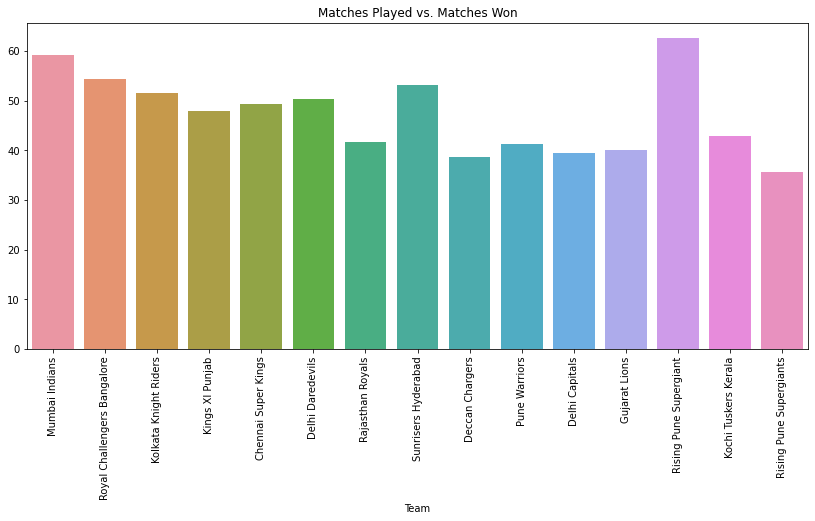

In [26]:
plt.figure(figsize=(14,6))
plt.xticks(rotation=90)
plt.title('Matches Played vs. Matches Won')
sns.barplot(x = matches_played['Total Matches'].index, y = win_percentage);

In this graph, we can clearly see that Rising Pune Supergiant has the best stats. But now that we know the reason, we can say that **Mumbai Indians have the best winning percentage as compared to other teams**.

## Maximum runs scored by a team

In [27]:
high_scores = deliveries_df.groupby(['id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
high_scores = high_scores[high_scores['total_runs']>=200]
high_scores.nlargest(10,'total_runs')

,id,inning,batting_team,bowling_team,total_runs
700,598027,1,Royal Challengers Bangalore,Pune Warriors,263
1116,980987,1,Royal Challengers Bangalore,Gujarat Lions,248
292,419137,1,Chennai Super Kings,Rajasthan Royals,246
1354,1136604,1,Kolkata Knight Riders,Kings XI Punjab,245
2,335983,1,Chennai Super Kings,Kings XI Punjab,240
1000,829795,1,Royal Challengers Bangalore,Mumbai Indians,235
472,501260,1,Kings XI Punjab,Royal Challengers Bangalore,232
1480,1178422,1,Kolkata Knight Riders,Mumbai Indians,232
398,501223,1,Delhi Daredevils,Kings XI Punjab,231
850,733987,1,Kings XI Punjab,Chennai Super Kings,231


**Royal Challengers Bangalore has scored the maximum runs in one innings against Pune Warriors India**, followed by Kolkata Knight Riders against Kings XI Punjab and then again Royal Challengers Bangalore against Gujarat Lions.

## Count of matches by Umpires

In [28]:
ump=pd.concat([ipl_df['umpire1'],ipl_df['umpire2']])
ump=ump.value_counts()
umps=ump.to_frame().reset_index()
umps.head(10)

,index,0
0,S Ravi,121
1,HDPK Dharmasena,94
2,AK Chaudhary,87
3,C Shamshuddin,82
4,M Erasmus,65
5,CK Nandan,57
6,Nitin Menon,57
7,SJA Taufel,55
8,Asad Rauf,51
9,VA Kulkarni,50


**S Ravi has umpired in 121 matches**, followed by Dharmasena who has umpired in 94 matches.

# Asking and Answering Questions

Now, let us answer some basic questions that one might want to know about the IPL seasons.

## Which Team has won the maximum number of seasons?

In [29]:
winning_teams = ipl_df[['Season','winner']]
winners_team = {}
for i in sorted(winning_teams.Season.unique()):
    winners_team[i] = winning_teams[winning_teams.Season == i]['winner'].tail(1).values[0]
winners_of_IPL = pd.Series(winners_team)
winners_of_IPL = pd.DataFrame(winners_of_IPL, columns=['team'])
winners_of_IPL.value_counts().index

MultiIndex([(       'Mumbai Indians',),
            (  'Chennai Super Kings',),
            ('Kolkata Knight Riders',),
            (      'Deccan Chargers',),
            (     'Rajasthan Royals',),
            (  'Sunrisers Hyderabad',)],
           names=['team'])

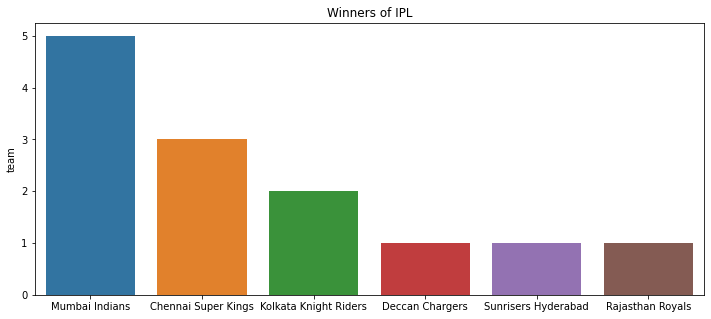

In [30]:
plt.figure(figsize=(12,5));
plt.title('Winners of IPL')
sns.barplot(y=winners_of_IPL['team'].value_counts(),x=winners_of_IPL['team'].value_counts().index);

**Mumbai Indians had won the IPL 5 times** while Chennai Super Kings had won it 3 times.

## Which team won the maximum number of matches in all seasons?

In [31]:
winner = ipl_df.winner.value_counts()
winner

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

Let's plot the above data using a barplot.

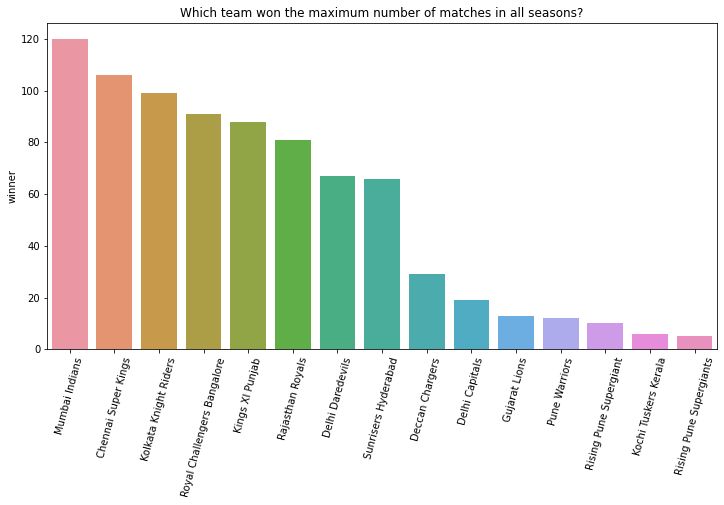

In [32]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Which team won the maximum number of matches in all seasons?')
sns.barplot(x= winner.index,y=winner);

We can see that **Mumbai Indians** have won the maximum number of matches in the last 12 seasons of IPL, followed by **Chennai Super Kings** and **Kolkata Knight Riders**. So, we may say that Mumbai Indians has been the most successful team in the IPL.
We can also see that few teams like Kochi Tuskers Kerala, Rising Pune Supergiants, Pune Warriors, etc. have won very less number of matches. The reason for this is they had played the IPL for just 1 or 2 seasons.

## Does winning the toss increase the chances of winning the match?

In [33]:
win = ipl_df.winner == ipl_df.toss_winner
win_counts = win.value_counts()
win_counts

True     418
False    398
dtype: int64

Out of 816 matches in the last 12 seasons, we can see that the toss winning team has won the match 418 times but has lost the match 398 times. Well, the difference is not that much.

Let's see the data in percentage first and then plot a pie chart for it.

In [34]:
round((win_counts/win.count())*100,2)

True     51.23
False    48.77
dtype: float64

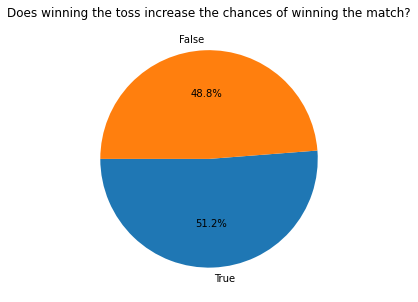

In [35]:
plt.figure(figsize=(8,5))
plt.title('Does winning the toss increase the chances of winning the match?')
plt.pie(win_counts,labels=win_counts.index,autopct='%1.1f%%', startangle=180);

## Which player has become the Man of the Match most number of times?

In [36]:
m_o_m = ipl_df.player_of_match.value_counts()
m_o_m

AB de Villiers     23
CH Gayle           22
RG Sharma          18
MS Dhoni           17
DA Warner          17
                   ..
DL Vettori          1
Shivam Mavi         1
RE Levi             1
Shoaib Akhtar       1
AA Jhunjhunwala     1
Name: player_of_match, Length: 233, dtype: int64

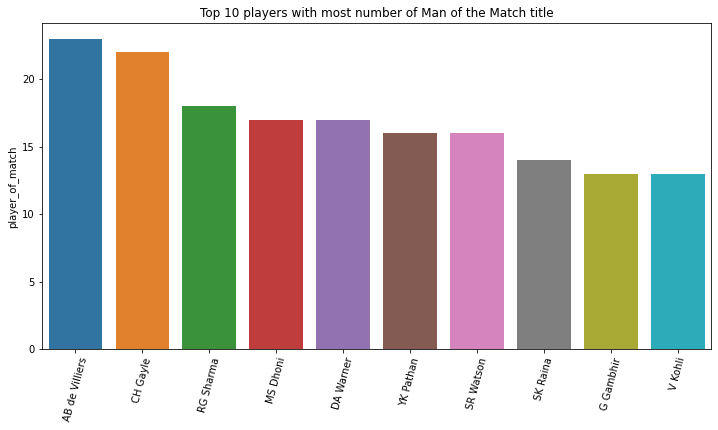

In [37]:
m_o_m_10 = m_o_m[:10]
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top 10 players with most number of Man of the Match title')
sns.barplot(x = m_o_m_10.index, y=m_o_m_10);

Whoh! The  Mr. 360 **AB de Villiers** has become Man of the Match most number of times, followed by GayleStorm **Chris Gayle**, our very own Hitman **Rohit Sharma**, Thalaiva **MS Dhoni** and Reverend **David Warner**.

But here's a quick fun fact : _Despite having outstanding performance in IPL, Chris Gayle had gone unsold twice in the IPL 2018 auction before being taken by Kings XI Punjab at his base price of ₹2 Crores_.

Now, let's again plot a barplot to see the same data more clearly.

## Which team has scored the most number of 200+ scores?

In [38]:
high_scores=deliveries_df.groupby(['id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
score_200=high_scores[high_scores['total_runs']>=200]
score_200.head()

,id,inning,batting_team,bowling_team,total_runs
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,222
2,335983,1,Chennai Super Kings,Kings XI Punjab,240
3,335983,2,Kings XI Punjab,Chennai Super Kings,207
14,335989,1,Chennai Super Kings,Mumbai Indians,208
15,335989,2,Mumbai Indians,Chennai Super Kings,202


In [39]:
x1=score_200['batting_team'].value_counts()
x1=pd.DataFrame(x1)
x1

,batting_team
Royal Challengers Bangalore,18
Chennai Super Kings,17
Kings XI Punjab,14
Mumbai Indians,14
Kolkata Knight Riders,12
Sunrisers Hyderabad,12
Rajasthan Royals,9
Delhi Daredevils,5
Delhi Capitals,2
Gujarat Lions,1


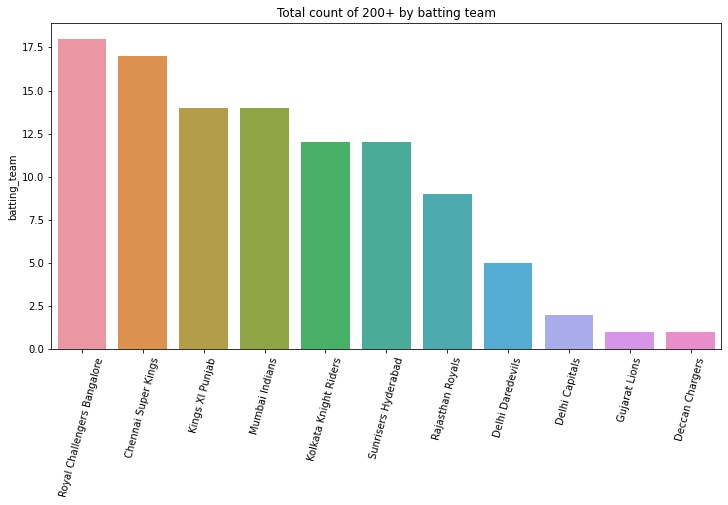

In [40]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Total count of 200+ by batting team')
sns.barplot(x=x1.index,y=x1['batting_team']);

**Royal Challengers Bangalore had scored the most 200+ score (18 times)**, followed by Chennai Super Kings who had scored 17 times.

# Inferences and Conclusion

These are the few conclusions that I can draw from the above analysis.

* During the analysis, we found that which team has won the maximum number of seasons, which team won the maximum number of matches in all seasons and Does winning the toss increase the chances of winning the match. Similarly we analysed Which player has become the Man of the Match most number of times and Which team has scored the most number of 200+ scores.

* There are several players who perform very good in these private tournaments. But sometimes, they aren't even selected in the playing 11 team or sometimes remain unsold. The reason can be their inconsistent performance that they become burden for their team. We can consider Chris Gayle. He performs outstanding in some matches while in other he becomes burden for the team.